In [1]:
# Importing all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Data Preparation

In [2]:
df = pd.read_csv("Cancer_dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print("Dataset Shape: {}\nDataset Size: {}".format(df.shape,df.size))

Dataset Shape: (569, 32)
Dataset Size: 18208


In [4]:
print("Number of Columns: ",len(df.columns))
print("\n",df.columns.values)

Number of Columns:  32

 ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


In [5]:
print("Total missing values in Dataset: ",df.isna().sum().sum())
print("\nColumn wise missing values in Dataset:\n",df.isna().sum())

Total missing values in Dataset:  0

Column wise missing values in Dataset:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst 

In [6]:
print("Number of Benign: {}\nNumber of Malignant: {}".format(df.diagnosis.value_counts()[0],
                                                               df.diagnosis.value_counts()[1]))

Number of Benign: 357
Number of Malignant: 212


**Independent Variables:** radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst

**Dependent Variables:** diagnosis

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


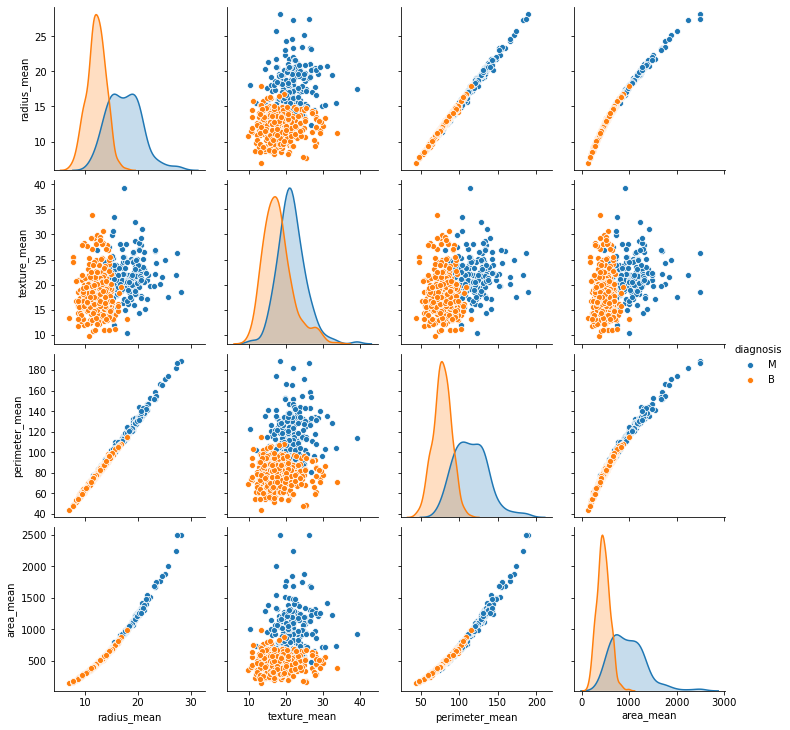

In [8]:
sns.pairplot(df.iloc[:, 1:6], hue="diagnosis")

#### My findings:

It can be clearly seen that a Malignant tumor have higher area, perimeter, and radius.

In [9]:
df.corr().abs()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,0.012968,0.000096,0.050080,0.044158,0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,0.002968,0.023203,0.035174,0.044224,0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.012968,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


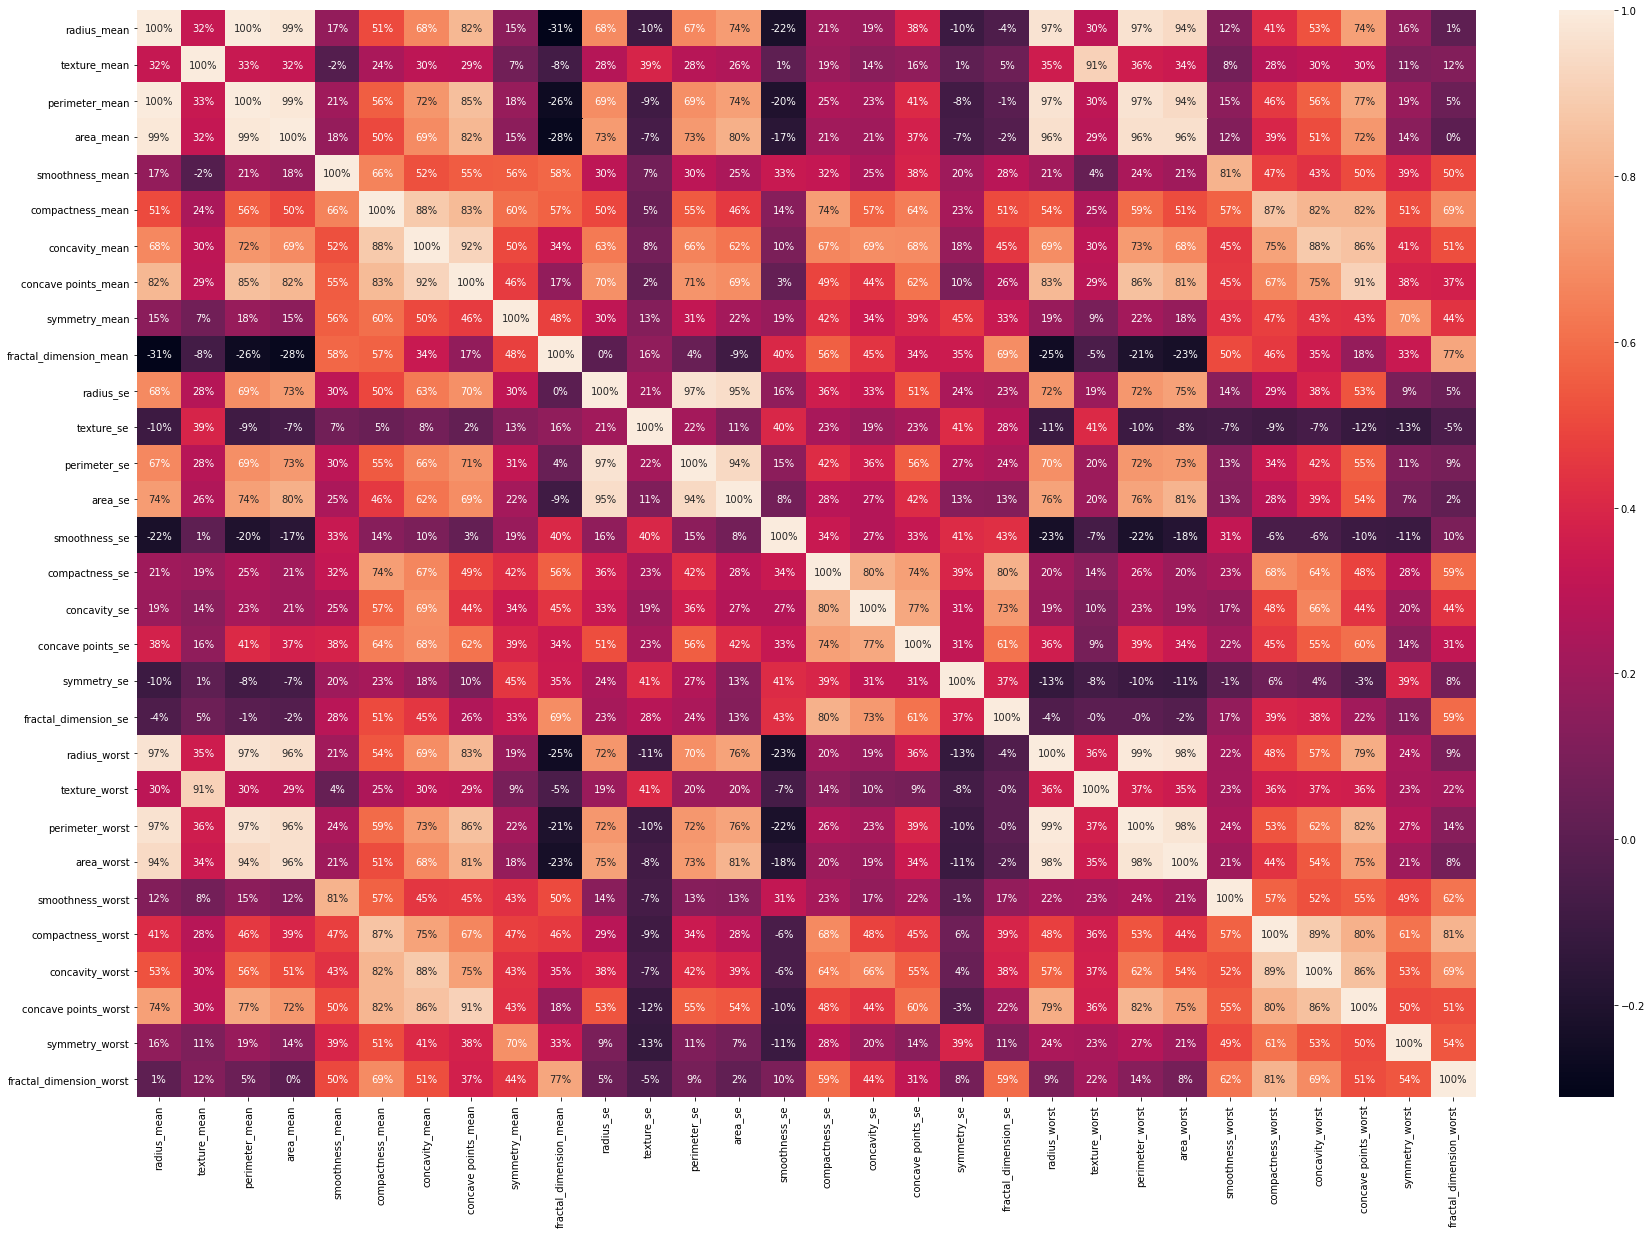

In [10]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df.iloc[:,1:].corr(), annot=True, fmt="0.0%", ax= ax)

## Preparing Data for Training

In [11]:
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1])

#df.iloc[:,1].head()  #Uncomment it to check the updated new column

In [12]:
print("Encoded to {} from {}\n".format(df.iloc[0,1],labelencoder_Y.inverse_transform(df.iloc[0,1].reshape(1,))))
print("Encoded to {} from {}\n".format(df.iloc[50,1],labelencoder_Y.inverse_transform(df.iloc[50,1].reshape(1,))))

Encoded to 1 from ['M']

Encoded to 0 from ['B']



### **Splitting The Data**

In [13]:
X = df.iloc[:,2:]
Y = df.iloc[:,1]

In [14]:
# Splitting the data into 75% training data and 25% testing data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [15]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (426, 30)
Shape of X_test:  (143, 30)
Shape of Y_train:  (426,)
Shape of Y_test:  (143,)


### Standardizing Features

In [16]:
scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.fit_transform(X_test)

In [17]:
print("Mean after Standardizing: ",X_train.mean())
print("Standard Deviation after Standardizing: ",X_train.std())

Mean after Standardizing:  1.765237234771767e-17
Standard Deviation after Standardizing:  1.0


## Implementing Models

In [18]:
decission_tree_model = DecisionTreeClassifier(random_state=0)
random_forest_model = RandomForestClassifier(random_state=0)
logistic_reg_model = LogisticRegression (random_state=0)

In [19]:
decission_tree_model.fit(X_train,Y_train)
random_forest_model.fit(X_train, Y_train)
logistic_reg_model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [20]:
# Checking if our models are not underfitting

print("Decision Tree Training Accuracy:", decission_tree_model.score(X_train, Y_train))
print("Random Forest Training Accuracy:", random_forest_model.score(X_train, Y_train))
print("Logistic Regression Training Accuracy:", logistic_reg_model.score(X_train, Y_train))

Decision Tree Training Accuracy: 1.0
Random Forest Training Accuracy: 1.0
Logistic Regression Training Accuracy: 0.9906103286384976


### Checking their Confusion Matrix

In [21]:
def check_confusion_matrix(Y_test, predicted_values):
    confu_matrix = confusion_matrix(Y_test, predicted_values)
    print(confu_matrix)
    TP = confu_matrix[0][0]
    TN = confu_matrix[1][1]
    FP = confu_matrix[0][1]
    FN = confu_matrix[1][0]
    print("\nTrue Possitive: {}".format(TP))
    print("True Negative: {}".format(TN))
    print("Fale Possitive: {}".format(FP))
    print("False Negative: {}".format(FN))
    print("\nPrecision: {}%".format(round((TP/(TP+FN))*100,2)))
    print("Recall: {}%".format(round((TP/(TP+FP))*100,2)))
    print("F1 Score or Harmonic Mean: {}%".format((round(f1_score(Y_test,predicted_values)*100,2))))

In [22]:
print("Decision Tree: ")
check_confusion_matrix(Y_test,decission_tree_model.predict(X_test))

Decision Tree: 
[[79 11]
 [ 2 51]]

True Possitive: 79
True Negative: 51
Fale Possitive: 11
False Negative: 2

Precision: 97.53%
Recall: 87.78%
F1 Score or Harmonic Mean: 88.7%


In [23]:
print("\nRandom Forest: ")
check_confusion_matrix(Y_test,random_forest_model.predict(X_test))


Random Forest: 
[[86  4]
 [ 1 52]]

True Possitive: 86
True Negative: 52
Fale Possitive: 4
False Negative: 1

Precision: 98.85%
Recall: 95.56%
F1 Score or Harmonic Mean: 95.41%


In [24]:
print("\nLogistic Regression: ")
check_confusion_matrix(Y_test,logistic_reg_model.predict(X_test))


Logistic Regression: 
[[86  4]
 [ 2 51]]

True Possitive: 86
True Negative: 51
Fale Possitive: 4
False Negative: 2

Precision: 97.73%
Recall: 95.56%
F1 Score or Harmonic Mean: 94.44%


## Conclusion

As we can see that **Random Forest Classifier** model is working best with your dataset here.

#### Reason?

In our use case, we need to have a higher Recall, as we don't want Malignant tumor patient to be called Benign and send them home.

Here you can see that both Random Forest and Logistic Regression are having same Recall values. But Random Forest have a slight higher Precision value, and that's why it's F1 score is also higher.